In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# loading Iris Dataset
data = load_iris()
print(data.data.shape)
print(data.target_names)

(150, 4)
['setosa' 'versicolor' 'virginica']


([], [])

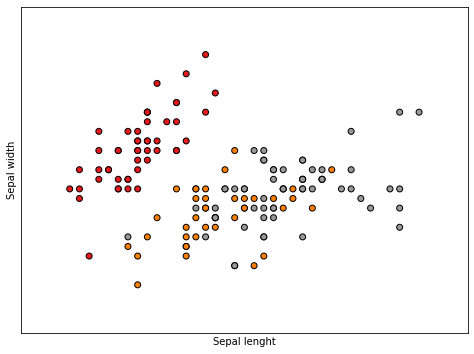

In [3]:
# import some data to play with
x = data.data[:, :2]
y = data.target
x_min, x_max = x[:,0].min()-0.5, x[:,0].max()+0.5
y_min, y_max = x[:,1].min()-0.5, x[:,1].max()+0.5
plt.figure(2, figsize=(8,6))
plt.clf()

#plot training points
plt.scatter(x[:,0],x[:,1], c=y, cmap=plt.cm.Set1, edgecolors='k')
plt.xlabel('Sepal lenght')
plt.ylabel('Sepal width')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks(())
plt.yticks(())

([], [])

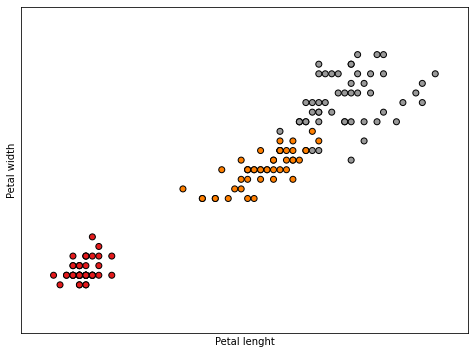

In [4]:
# import some data to play with
x = data.data[:, 2:4]
y = data.target
x_min, x_max = x[:,0].min()-0.5, x[:,0].max()+0.5
y_min, y_max = x[:,1].min()-0.5, x[:,1].max()+0.5
plt.figure(2, figsize=(8,6))
plt.clf()

#plot training points
plt.scatter(x[:,0],x[:,1], c=y, cmap=plt.cm.Set1, edgecolors='k')
plt.xlabel('Petal lenght')
plt.ylabel('Petal width')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks(())
plt.yticks(())

In [5]:
# Divide the data into training and testing set
X = data.data
Y = data.target

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
nbr = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)

In [6]:
# finding the distances and indices from each training points
distance, indices = nbr.kneighbors(x_test.reshape(-1,4), return_distance=True)

In [7]:
# Print the distances
distance.shape

(45, 3)

In [8]:
indices

array([[ 73,  63,  91],
       [ 18,   5,  10],
       [118, 122, 105],
       [ 78,  91,  63],
       [ 76,  58,  86],
       [ 31,  20,  27],
       [ 64,  82,  79],
       [141, 145, 139],
       [ 68,  87,  72],
       [ 82,  92,  99],
       [110, 147, 115],
       [ 12,   1,   9],
       [ 36,  10,  31],
       [  9,  34,   1],
       [ 19,  21,  46],
       [ 56,  51,  85],
       [104, 132, 128],
       [ 69,  80,  89],
       [ 55,  66,  90],
       [132, 128, 104],
       [ 29,  30,   3],
       [127, 138, 126],
       [ 26,  23,  43],
       [128, 132, 104],
       [131, 117, 105],
       [145, 141, 147],
       [108, 128, 103],
       [143, 120, 124],
       [ 45,   1,  12],
       [ 30,  29,  34],
       [ 22,   6,   2],
       [ 15,  33,  14],
       [ 65,  75,  58],
       [ 11,  29,   7],
       [ 42,  38,  47],
       [146, 123, 111],
       [ 51,  56,  75],
       [ 27,  28,   0],
       [  4,  37,   0],
       [ 32,  46,  33],
       [142, 101, 113],
       [ 85,  56

In [9]:
#now lets work with KNeighborClassification
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# used the trained model to predict the label or classes of test data
classification_results = neigh.predict(x_test)

In [11]:
#Print the results of your prediction
classification_results

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [12]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [16]:
# Finding the posteriori probability of our classifier
neigh.predict_proba(x_test)

In [21]:
#Computing classification metrics
print(metrics.classification_report(classification_results,y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Confusion matrix, without normalization
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


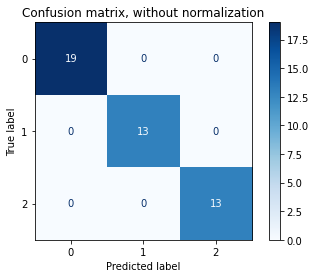

In [14]:
# Plot non-normilized confusion matrix
from sklearn.metrics import plot_confusion_matrix
title_options = [("Confusion matrix, without normalization", None)]

for title, normalize in title_options:
    disp = plot_confusion_matrix(neigh, x_test, y_test, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)


    print(title)
    print(disp.confusion_matrix)
plt.show()
